In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

2.12.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Label	Class
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels) 

60000

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
type(test_images)

numpy.ndarray

In [9]:
test_images.ndim

3

In [10]:
len(test_labels)

10000

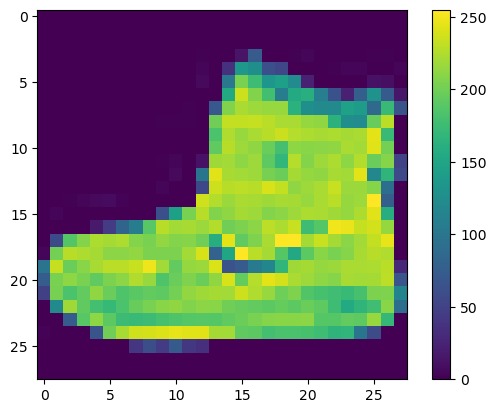

In [11]:
plt.figure()
plt.imshow(train_images[0]) #indexing
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

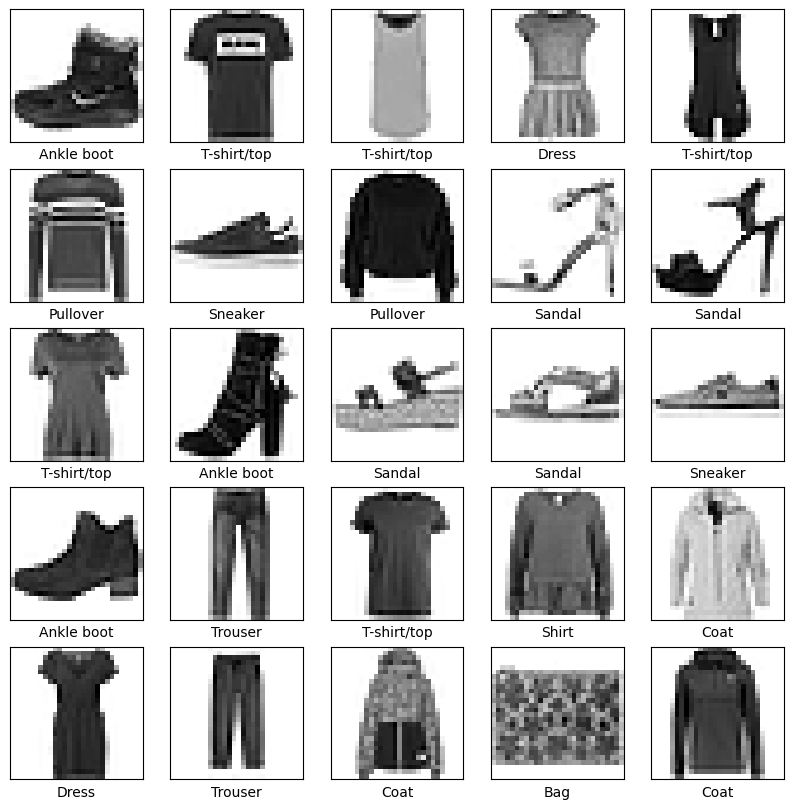

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4973 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3782 - accuracy: 0.8622
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3410 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3163 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2970 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2820 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2702 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2593 - accuracy: 0.9029
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2521 - accuracy: 0.9061
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.241

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3520 - accuracy: 0.8782 - 587ms/epoch - 2ms/step

Test accuracy: 0.8781999945640564


In [18]:
probability_model=tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions=probability_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [20]:
predictions

array([[9.61627933e-09, 3.05568369e-13, 4.01274458e-10, ...,
        4.73122345e-04, 6.66550773e-11, 9.99523222e-01],
       [4.62363278e-05, 2.65187663e-11, 9.98551428e-01, ...,
        4.86554836e-16, 1.73199267e-11, 8.67295500e-15],
       [3.50490803e-10, 9.99999940e-01, 2.17622479e-15, ...,
        1.06785356e-23, 2.39334296e-13, 1.23693339e-22],
       ...,
       [8.10611760e-04, 1.79767365e-08, 7.29579115e-05, ...,
        9.88147377e-08, 9.95335221e-01, 9.88723858e-09],
       [6.90591264e-08, 9.99911606e-01, 1.21762911e-09, ...,
        2.06829643e-16, 7.81821754e-08, 1.02749319e-11],
       [4.89843835e-04, 1.49763464e-05, 2.85605958e-04, ...,
        3.65691558e-02, 1.39972568e-03, 1.34433445e-04]], dtype=float32)

In [21]:
#Predctns=model.predict(test_images)

In [22]:
#Predctns

In [23]:
predictions[0]

array([9.6162793e-09, 3.0556837e-13, 4.0127446e-10, 4.3884713e-15,
       1.5095887e-10, 3.5373062e-06, 1.3788924e-09, 4.7312235e-04,
       6.6655077e-11, 9.9952322e-01], dtype=float32)

In [24]:
np.argmax(predictions[0])

9

In [25]:
#reshaped_images = np.reshape(test_images, (test_images.shape[0], 28 * 28))

#pred = probability_model.predict(reshaped_images[0])

In [26]:
test_labels[0]

9

In [27]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

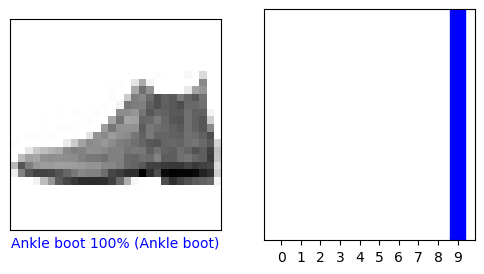

In [28]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

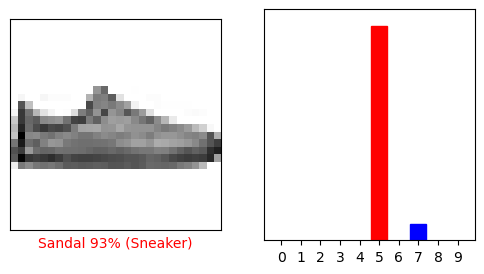

In [29]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

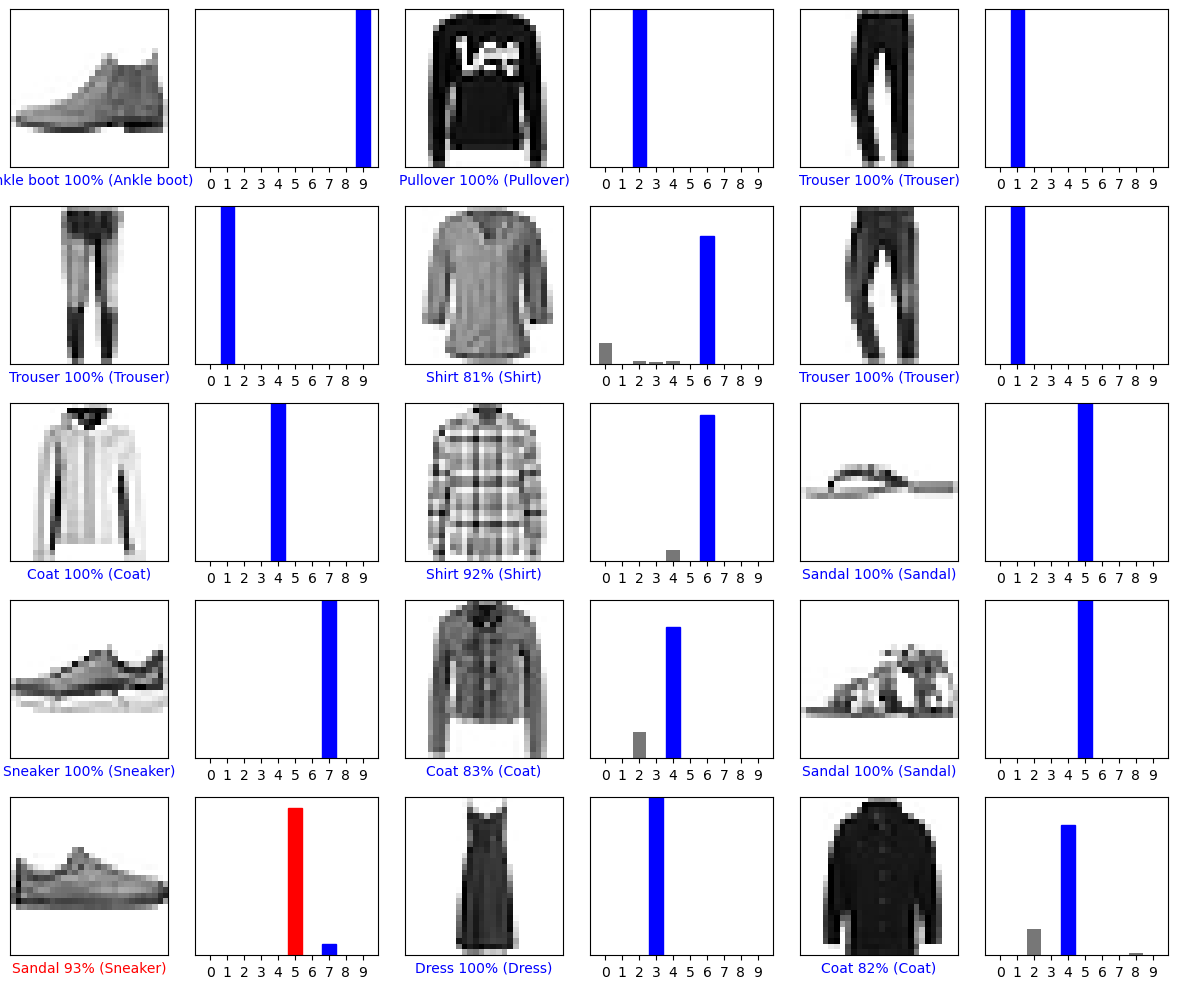

In [30]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [31]:
img = test_images[1]

print(img.shape)

(28, 28)


In [32]:
img

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05098039, 0.2627451 , 0.        , 0.        , 0.        ,
        0.        , 0.19607843, 0.14901961, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.03137255, 0.47058824, 0.81960784,
        0.88627451, 0.96862745, 0.92941176, 1.        , 1.        ,
        1.        , 0.96862745, 0.93333333, 0.92156863, 0.6745098 ,
        0.28235294, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5372549 , 0.9372549 , 0.98823529, 0.95294118,
        0.91764706, 0.89803922, 0.93333333, 0.95686275, 0.96470588,
        0.94117647, 0.9019

In [33]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [34]:
img

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.05098039, 0.2627451 , 0.        , 0.        , 0.        ,
         0.        , 0.19607843, 0.14901961, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.03137255, 0.47058824, 0.81960784,
         0.88627451, 0.96862745, 0.92941176, 1.        , 1.        ,
         1.        , 0.96862745, 0.93333333, 0.92156863, 0.6745098 ,
         0.28235294, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.5372549 , 0.9372549 , 0.98823529, 0.95294118,
         0.91764706, 0.89803922, 0.93333333, 0.95686275, 0.96470588,
         0.

In [35]:
predictions_single=probability_model.predict(img)

1/1 [==============================] - 0s 21ms/step


In [36]:
predictions_single

array([[4.6236415e-05, 2.6518968e-11, 9.9855143e-01, 7.0836481e-10,
        1.3439906e-03, 4.8434108e-12, 5.8302558e-05, 4.8655669e-16,
        1.7319927e-11, 8.6729550e-15]], dtype=float32)

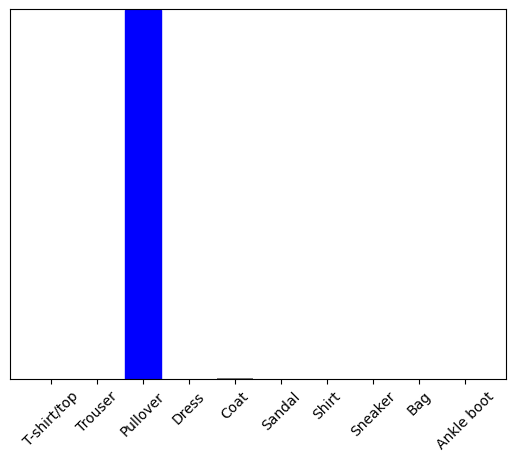

In [37]:
plot_value_array(1,predictions_single[0],test_labels)

_=plt.xticks(range(10),class_names,rotation=45)
plt.show()

In [38]:
np.argmax(predictions_single[0])

2

In [39]:
probability_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 10)                101770    
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
